# Crea una gráfica de barras que represente a los 10 países con
más medallas ganadas

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import csv

In [4]:
datos = pd.read_csv("athlete_events.csv")

In [5]:
datos

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


In [9]:
paises_medalleros = datos[['NOC', 'Year']]

In [10]:
paises_medalleros

,NOC,Year
0,CHN,1992
1,CHN,2012
2,DEN,1920
3,DEN,1900
4,NED,1988
...,...,...
271111,POL,1976
271112,POL,2014
271113,POL,2014
271114,POL,1998


In [11]:
paises_medalleros.head(10)

,NOC,Year
0,CHN,1992
1,CHN,2012
2,DEN,1920
3,DEN,1900
4,NED,1988
5,NED,1988
6,NED,1992
7,NED,1992
8,NED,1994
9,NED,1994


In [12]:
paises_medalleros['NOC'].value_counts()

USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
       ...  
YMD        5
SSD        3
UNK        2
NBO        2
NFL        1
Name: NOC, Length: 230, dtype: int64

In [13]:
paises_medalleros['NOC'].value_counts().head(10)
# con notna podemos quitarle los datos nulos

USA    18853
FRA    12758
GBR    12256
ITA    10715
GER     9830
CAN     9733
JPN     8444
SWE     8339
AUS     7638
HUN     6607
Name: NOC, dtype: int64

<AxesSubplot:>

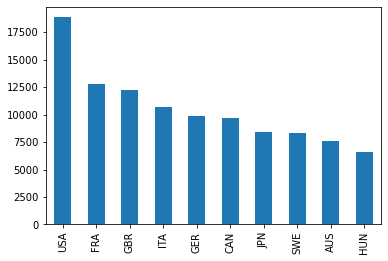

In [14]:
paises_medalleros['NOC'].value_counts().head(10).plot(kind='bar')

# Vamos a trabajar con tiempo

In [26]:
tiempo = datos[["Year", "Season", "Medal","NOC",]] # los dobles corchetes me traen las columnas como tal

In [21]:
tiempo

,Year,Season,Medal,NOC
0,1992,Summer,NaN,CHN
1,2012,Summer,NaN,CHN
2,1920,Summer,NaN,DEN
3,1900,Summer,Gold,DEN
4,1988,Winter,NaN,NED
...,...,...,...,...
271111,1976,Winter,NaN,POL
271112,2014,Winter,NaN,POL
271113,2014,Winter,NaN,POL
271114,1998,Winter,NaN,POL


In [34]:
tiempo.head(2)

,Year,Season,Medal,NOC
0,1992,Summer,NaN,CHN
1,2012,Summer,NaN,CHN


In [35]:
df_2= pd.get_dummies(tiempo[["Medal"]])

In [36]:
df_2.head(2)

,Medal_Bronze,Medal_Gold,Medal_Silver
0,0,0,0
1,0,0,0


In [37]:
result= pd.concat([tiempo,df_2], axis=1) # para concatenar

In [38]:
result.head(2)

,Year,Season,Medal,NOC,Medal_Bronze,Medal_Gold,Medal_Silver
0,1992,Summer,NaN,CHN,0,0,0
1,2012,Summer,NaN,CHN,0,0,0


In [40]:
tiempo_2= result.groupby(["Year","Medal","Season"]).sum()

In [41]:
tiempo_2

Medal_Bronze  Medal_Gold  Medal_Silver
Year Medal  Season                                        
1896 Bronze Summer          38.0         0.0           0.0
     Gold   Summer           0.0        62.0           0.0
     Silver Summer           0.0         0.0          43.0
1900 Bronze Summer         175.0         0.0           0.0
     Gold   Summer           0.0       201.0           0.0
...                          ...         ...           ...
2014 Gold   Winter           0.0       202.0           0.0
     Silver Winter           0.0         0.0         197.0
2016 Bronze Summer         703.0         0.0           0.0
     Gold   Summer           0.0       665.0           0.0
     Silver Summer           0.0         0.0         655.0

[153 rows x 3 columns]

In [43]:
tiempo_2.head(5)

Medal_Bronze  Medal_Gold  Medal_Silver
Year Medal  Season                                        
1896 Bronze Summer          38.0         0.0           0.0
     Gold   Summer           0.0        62.0           0.0
     Silver Summer           0.0         0.0          43.0
1900 Bronze Summer         175.0         0.0           0.0
     Gold   Summer           0.0       201.0           0.0

<AxesSubplot:xlabel='Year,Medal,Season'>

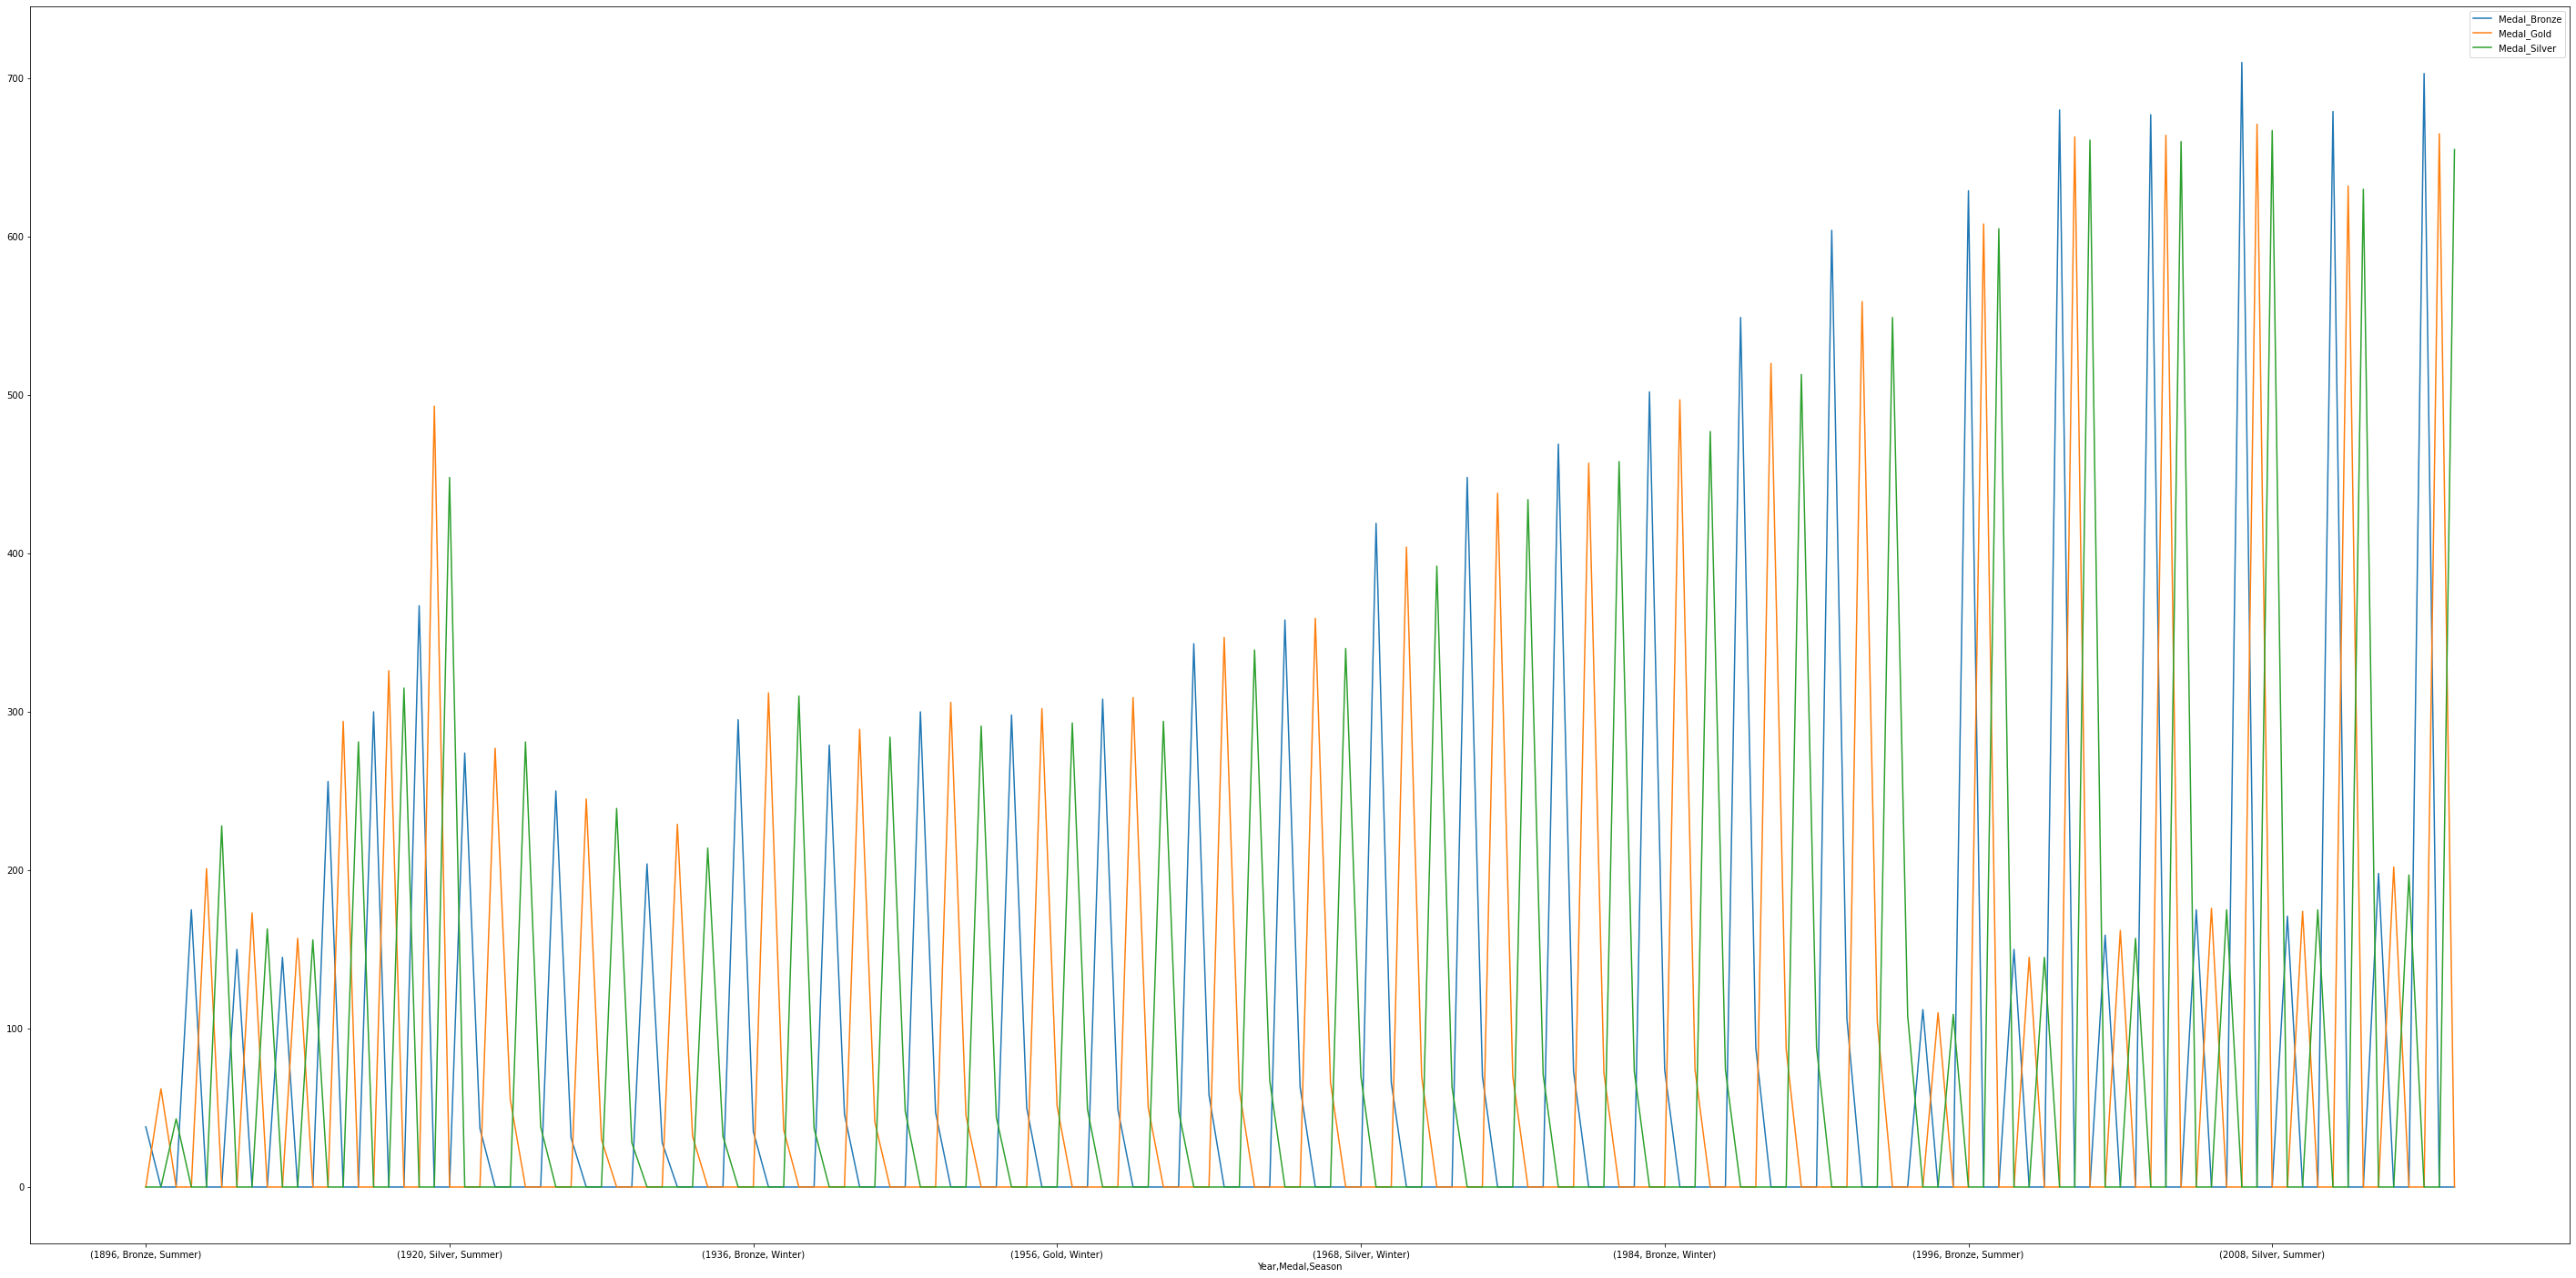

In [44]:
tiempo_2.plot(figsize=(50,25))

In [46]:
tiempo_3=tiempo_2[:12]# para mostrar los 12 primeros en gráficas

In [47]:
tiempo_3

Medal_Bronze  Medal_Gold  Medal_Silver
Year Medal  Season                                        
1896 Bronze Summer          38.0         0.0           0.0
     Gold   Summer           0.0        62.0           0.0
     Silver Summer           0.0         0.0          43.0
1900 Bronze Summer         175.0         0.0           0.0
     Gold   Summer           0.0       201.0           0.0
     Silver Summer           0.0         0.0         228.0
1904 Bronze Summer         150.0         0.0           0.0
     Gold   Summer           0.0       173.0           0.0
     Silver Summer           0.0         0.0         163.0
1906 Bronze Summer         145.0         0.0           0.0
     Gold   Summer           0.0       157.0           0.0
     Silver Summer           0.0         0.0         156.0

<AxesSubplot:xlabel='Year,Medal,Season'>

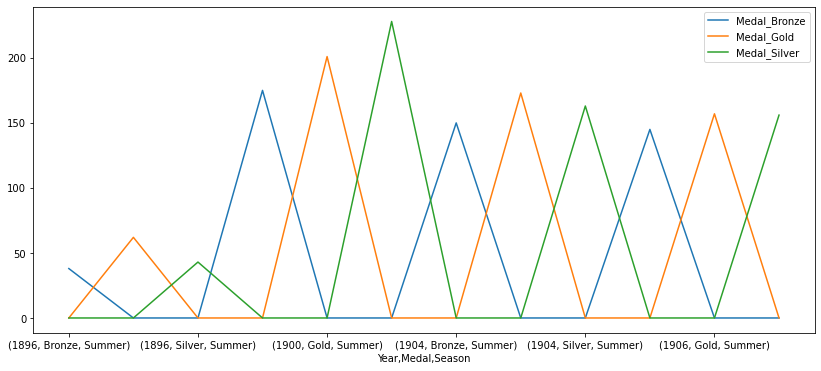

In [48]:
tiempo_3.plot(figsize=(14,6))